In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [2]:
data = pd.read_csv('cleaned_data.csv')

In [3]:
# Extract Response and Predictors
y = pd.DataFrame(data['price'])
X = data.drop(columns=["neighbourhood_group","neighbourhood","room_type","price","name","host_name"], axis=1)

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (6324, 55) (6324, 1)
Test Set  : (1581, 55) (1581, 1)


LinearRegression()

### Coefficients of Linear Regression Model

In [4]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [149.61712523]
Coefficients 	: a =  [[ 5.63006913e-02 -6.83870981e-01  8.00316500e+00 -2.79672704e-01
  -1.63495695e+01  3.15008402e+01 -6.58018776e+01  4.33260662e+01
  -1.19496321e+02  3.03954073e+02 -8.45780010e+01  2.13973864e+01
  -9.98949029e+01 -1.97872524e+01 -6.41484134e+01 -1.10572779e+02
   2.12741591e+01  1.17256362e+01 -7.55382405e+01 -7.65847145e+01
   2.18983584e+01 -8.05483787e+01  2.14511409e+02 -1.09951867e+02
  -5.46016618e+01 -7.19676937e+01 -1.07667921e+02  1.27503085e+01
  -7.99007352e+01 -4.83785391e+01 -1.81768685e+01 -1.11754796e+02
  -9.74758181e+01 -5.12986553e+01 -1.91595158e+01 -2.10624789e+01
  -1.08967314e+01 -4.26399599e+01  1.27295823e+03  6.91139130e+01
  -2.77051082e+00 -9.00829935e+01 -8.72683798e+01  4.44089210e-14
  -1.40422209e+02 -4.22431863e+01 -3.38941074e+00  7.44273621e+01
  -1.96482097e+01 -3.29308337e+01 -4.52114892e+01  2.33631706e+01
   1.00182678e+02 -1.87619349e+01 -8.14207436e+01]]


### Prediction of Response based on the Predictor

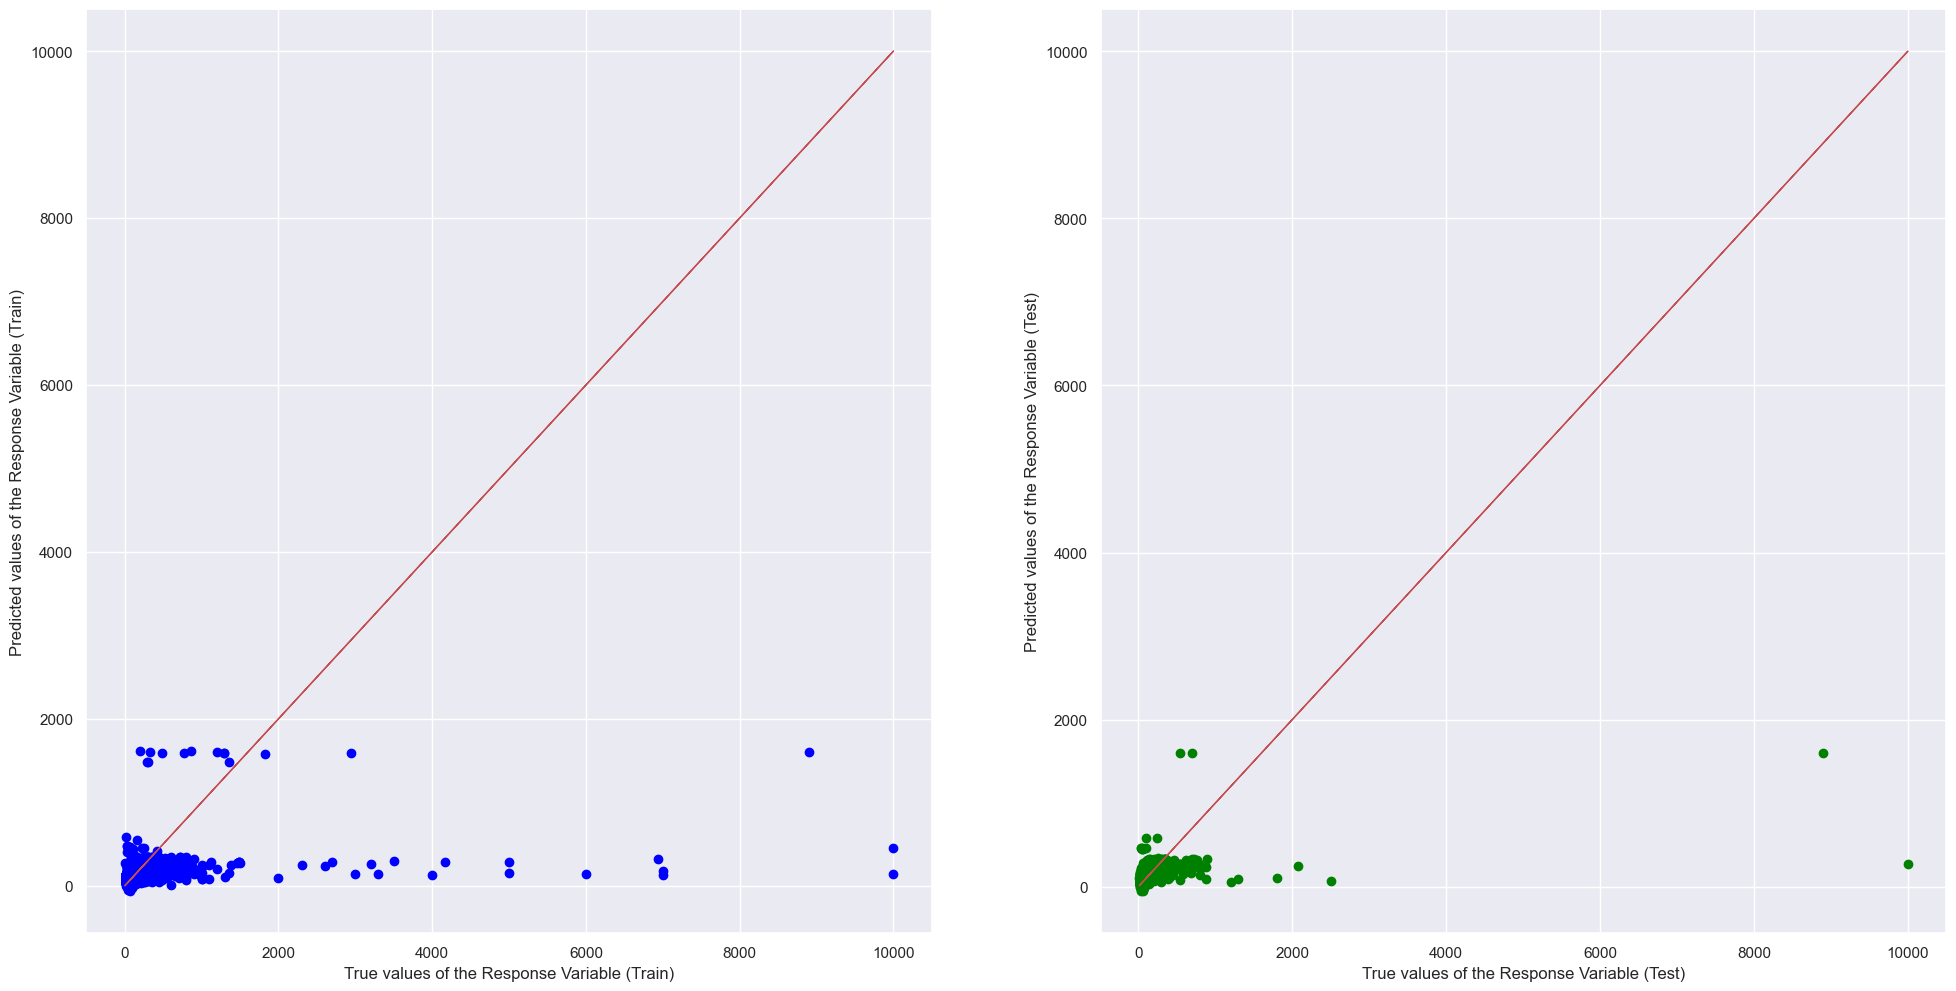

In [5]:
# Predict SalePrice values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [6]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) on Train Set \t:", sqrt(mean_squared_error(y_train, y_train_pred)))

Explained Variance (R^2) on Train Set 	: 0.0843144500466475
Mean Squared Error (MSE) on Train Set 	: 102062.43388334638
Root Mean Squared Error (RMSE) on Train Set 	: 319.4721175366426


In [7]:
print("Explained Variance (R^2) on Test Set \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) on Test Set \t:", sqrt(mean_squared_error(y_test, y_test_pred)))
print("Mean Absolute Error (MAE) on Test Set \t:", mean_absolute_error(y_test, y_test_pred))

Explained Variance (R^2) on Test Set 	: 0.13574064479791137
Mean Squared Error (MSE) on Test Set 	: 114683.61919732377
Root Mean Squared Error (RMSE) on Test Set 	: 338.6496998335061
Mean Absolute Error (MAE) on Test Set 	: 86.84221462613931
